# <center><font size=6, color="#7B242F"><u>The Theory of Extreme Gradient Boosting Machine (XGBoost)</u> </font>

## Introduction

 - **Extreme Gradiend Boosting** is currently the __state-of-the-art__ algorithm for building predictive models on real-world datasets. 
    
- Gradient boosting is currently one of the most popular techniques for efficient modeling of tabular datasets of all sizes.

- **XGboost** is a very fast, scalable implementation of gradient boosting.

- Models using XGBoost regularly winning online data science competitions and being used at scale across different industries. 


___

## XGBoost Library

- **XGBoost**: is an optimized Gradient-boosting machine learning library.

- **XGBoost** is a popular machine learning library for good reasons:
    - It was developed originally as a C++ command-line application.
    - After winning a popular machine learning competition on **kaggle**in 2016, **Tianqi Chen** and **Carlos Guestrin** authored XGBoost: A Scalable Tree Boosting System to present their algorithm to the larger machine learning community.
    - The adoption result of the algorithm by the ML community is bindings, or functions that tapped into the core C++ code, started appearing in a variety of other languages, including Python, R, Scala, and Julia. 

___

## The Technical Key Aspects of XGBoost: Speed

- The **Extreme** in Extreme Gradient Boosting means **pushing computational limits to the extreme**. Pushing computational limits requires knowledge not just of model-building but also of disk-reading, compression, cache, and cores.

The following new design features give XGBoost a big edge in speed over comparable ensemble algorithms:

 1. Approximate split-finding algorithm: XGBoost presents an exact greedy algorithm in addition to a new approximate split-finding algorithm. The split-finding algorithm uses quantiles, percentages that split data, to propose candidate splits. In a global proposal, the same quantiles are used throughout the entire training, and in a local proposal, new quantiles are provided for each round of splitting.
 
 
 2. Sparsity aware split-finding: Sparse matrices are designed to only store data points with non-zero and non-null values. This saves valuable space. A sparsity-aware split indicates that when looking for splits, XGBoost is faster because its matrices are sparse.
 
 3. Parallel computing: it is parallelizable onto GPU's and across networks of computers, making it feasible to train models on very large datasets on the order of hundreds of millions of training examples. 
 4. Cache-aware accessL: The data on a computer is separated into **cache** and **main memory**. The cache, what we use most often, is reserved for high-speed memory.
 5. Block compression and sharding:
     1. **Sharding** is a method for distributing a single dataset across multiple databases, which can then be stored on multiple machines. This allows for larger datasets to be split in smaller chunks and stored in multiple data nodes, increasing the total storage capacity of the system. 
         - Block sharding decreases read times by sharding the data into multiple disks that alternate when reading the data.
         
    2. Block compression helps with computationally expensive disk reading by compressing columns.

___

# XGBoost Learning Objective and Base Learners

- In order to fully understand why XGBoost is such a powerful approach to building supervised learning models (regression and classificatin), two concetps are needed to comprehend:
    - **Loss function** also called **Learning objective function**.
    - **Base learners or the booster**: is s the machine learning model that is constructed during every round of boosting. **gbtree** is XGBoost default base learner. Other base learner are available such as **gblinear**, **DART (Dropouts meet Multiple Additive Regression Trees)**. Check [here](https://xgboost.readthedocs.io/en/stable/tutorials/dart.html#dart-booster) to learner more about DART


## Learning Objective 

  - **The learning objective or objective function** of a machine learning model determines how well the model fits the data. When we construct any machine learning model, we do so in the hopes that it minimizes the loss function across all of the data points we pass in. That's our ultimate goal, the smallest possible loss.
  
  
  - In the case of XGBoost, the learning objective consists of two parts: the loss function and the regularization term.
  
  
  $$\text{obj}(\theta) = L(\theta) + \Omega(\theta)$$
  
  
where $L$ is the training loss function, and $\Omega$ is the regularization term. The training loss measures how predictive our model is with respect to the training data. 

A common choice of $L$ is the mean squared error, which is given by:

$$L(\theta) = \sum_i (y_i-\hat{y}_i)^2$$

Another commonly used loss function is logistic loss, to be used for logistic regression:

$$L(\theta) = \sum_i[ y_i\ln (1+e^{-\hat{y}_i}) + (1-y_i)\ln (1+e^{\hat{y}_i})]$$

The **regularization term** is what people usually forget to add. The regularization term controls the complexity of the model, which helps us to avoid overfitting.

For mathematical derivation, check the documentation [here](https://xgboost.readthedocs.io/en/latest/tutorials/model.html#objective-function-training-loss-regularization).


### Common loss functions and XGBoost

 - **Loss functions** have specific naming conventions in XGBoost:
      - For regression models: the most common loss function used is called **reg:linear**. 
      - For binary classification models: The most common loss functions used are
          - **reg:logistic** when you simply want the category of the target. 
          - **binary:logistic**, when you want the actual predicted probability of the positive class. 
          - **multi:softpob**, when the dataset includes multiple classes. It computes the probabilities of classification and chooses the highest one.
          - **reg:squarederror**: regression with squared loss.
          
Check [here](https://xgboost.readthedocs.io/en/stable/parameter.html#learning-task-parameters) for a full list of objective functions. 

## Base Learners

- The **base learner** is the machine learning model **that XGBoost** uses to build the first model in its ensemble. The word **base** is used because it's the model that comes first, and the word **learner** is used because the model iterates upon itself after learning from the errors.

- **XGBoost** is an **ensemble learning method** composed of many individual models that are added together to generate a single prediction. 

- **Base learners** are the individual models that are trained and combined in XGBoost to generate predictions.

- **The goal of XGBoost** is to have base learners that is slightly better than random guessing on certain subsets of training examples, and uniformly bad at the remainder, so that when all of the predictions are combined, the uniformly bad predictions cancel out and those slightly better than chance combine into a single very good prediction. 

## Installing and Importing xgboost

The **xgboost** package is available at PyPI (Python Package Index), thus you can install it by using one of the following commands:

```python 
# If you are using a command line use this:
pip install xgboost 

# On jupyter use this
!pip install xgboost

# Or use conda manager
conda install xgboost
```

### Example: Trees as Base Learners with SKLearn API

- Here's an example of how to train an XGBoost classification model with trees as base learners using **XGBoost's scikit-learn** compatible API. 

   1. Import the libraries you need 
   2. Load in the data. 
   3. Convert you data into your X matrix and y vector.
   4. Split X and y into training and test sets.
   5. Create your XGBoost classifier object using the **binary:logistic** objective function. (for binary classification) 
   6. Fit the classifier to the training data.
   7. Generate predictions on the test set.
   8. Assess the model by computing the convenient metric such as __accuracy score__.

**Python syntax for training a classification model** 
```python 
# Import XGBClassifier
from xgboost import XGBClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split

# Read in the data (.csv for example)
my_data = pd.read_csv('data.csv')

# Create array for the features and the target

X my_data.iloc[:, :-1]
y = my_data.iloc[:, -1]

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2,
                                                    random_state=1)

# Create xgboost classifier object
xgb_clf = xgb.XGBRegressor(objective="binary:logistic",
                           n_estimators = 10, 
                           random_state = 1,
                           eval_metric='logloss')

# Fit the classifier
xgb_clf.fit(X_train, y_train)

# Make predictions
preds = xgb_clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(preds, y_test)

# Print the metric
print("The RMSE is: {:.5f}".format(rmse))
```

Note: **XGBoost** has its own API if you wish to shift the gear and use Its native API. 

# <center> <font color='blue'> XGBoost Hyperparameters</font>

 - Since the base learner of xgboost is **gradient boosting tree**, then all its hyperparameters are incorporated in xgboost. This makes sense, because  XGBoost is an enhanced version of gradient boosting. 
 
 
 - There are other hyperparameters specific to xgboost, and they are designed to improve upon accuracy and speed.
 
 
 - Dealing with hyperparameters is an art and a science, you can't tackle them all but you should find a way to get around this process, and remember that there is **no size fits-all**. Trying different approaches is good.


___
## <center> The list of XGBoost Hyperparameters
_______
    
  - Learning any software is tiresome at the beginning, even you might feel frustrated at first, however, there are some techniques might help to solve this issue. Personally, when I start learning anything new, I would like to have a broader idea or a generall overview. Learing a python module is no different; so, in future when I need something, I remember not specifically, but I could narrow my search area. I think this is better than not knowing with area to seach. Therefore, I will print all the `XGBoost` hyperparameters, so some of them will stick in my memory. 
  

The next piece of code will print the default parameters of `XGBoost` classifier

In [1]:
# The list of parameters of xgboost classifier
# --------------------------------------------
from xgboost import XGBClassifier
xgb_obj = XGBClassifier()
for param, val in xgb_obj.get_params().items():
    print(f'{param:25}: {val}')

print("="*40)
print("The number of total parameters", len(xgb_obj.get_params()))
print("="*40)

objective                : binary:logistic
use_label_encoder        : True
base_score               : None
booster                  : None
colsample_bylevel        : None
colsample_bynode         : None
colsample_bytree         : None
enable_categorical       : False
gamma                    : None
gpu_id                   : None
importance_type          : None
interaction_constraints  : None
learning_rate            : None
max_delta_step           : None
max_depth                : None
min_child_weight         : None
missing                  : nan
monotone_constraints     : None
n_estimators             : 100
n_jobs                   : None
num_parallel_tree        : None
predictor                : None
random_state             : None
reg_alpha                : None
reg_lambda               : None
scale_pos_weight         : None
subsample                : None
tree_method              : None
validate_parameters      : None
verbosity                : None
The number of total parameters

### The xgboost specific parameters

- It is also possible to get hyperparameters that unique to `xgboost`. 

In [2]:
for param, val in xgb_obj.get_xgb_params().items():
    print(f'{param:25}: {val}')
    
print("="*40)
print("The number of xgboost parameters", len(xgb_obj.get_params()))
print("="*40)

objective                : binary:logistic
base_score               : None
booster                  : None
colsample_bylevel        : None
colsample_bynode         : None
colsample_bytree         : None
gamma                    : None
gpu_id                   : None
interaction_constraints  : None
learning_rate            : None
max_delta_step           : None
max_depth                : None
min_child_weight         : None
monotone_constraints     : None
n_jobs                   : None
num_parallel_tree        : None
predictor                : None
random_state             : None
reg_alpha                : None
reg_lambda               : None
scale_pos_weight         : None
subsample                : None
tree_method              : None
validate_parameters      : None
verbosity                : None
The number of xgboost parameters 30


# <center><font size=6, color="#7B242F"><u>Classification with XGBoost: Heart Disease Project</u> </font>

In [3]:
## ======================================================================
#            Importing the necessary modules and tools
## ======================================================================

import pandas as pd; import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import time


# Import XGBRegressor
from xgboost import XGBClassifier

# Preprocessing tools
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# import the metrics for classification
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report , confusion_matrix

# Set notebook options
# --------------------
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline

# Silence warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the data and print the first 5 rows

hd = pd.read_csv('heart_disease.csv')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [5]:
# print the information about the data

hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# check missingness

hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Check data types

hd.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## <center><u><font size=6, color="#990099">Training XGBoost Classifier</font></u> 

## Baseline model

In [8]:
# Splitting the data into train and test sets

X = hd.iloc[:, :-1]
y = hd.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=101)

In [9]:
# Instantiate xgboost classifier with
#        booster = "gbtree"
#        objective='binary:logistic'
#        eval_metric='logloss'
#--------------------------------------

xgb_clf = XGBClassifier(booster='gbtree', 
                      objective='binary:logistic',
                      random_state=101, 
                      use_label_encoder=False,
                      eval_metric = 'logloss')

Although XGBClassifier includes these values by default, we include them here to gain familiarity in preparation of modifying them in later sections.

In [10]:
# Fit the classifier
# ------------------
xgb_clf.fit(X_train, y_train)

# Generate predictions
# ---------------------
pred = xgb_clf.predict(X_test)

# Score the results
# -----------------
score = accuracy_score(y_test, pred)
print("*"*30)
print('The accuracy score : {:.3f}'.format(score))
print("*"*30)

******************************
The accuracy score : 0.852
******************************


# <center><u> Using Cross Validation</u>

- Testing the model only one fold may give us missleading results. Thus, using cross validation is a better choice specifically in case of small datasets.

In [13]:
# Train the classifier using cross_val_score

cv_scores = cross_val_score(xgb_clf,
                         X, y, 
                         cv=5)

print("*"*50)
print('Accuracy:', np.round(cv_scores, 2))
print("*"*50)

print('The percentage of mean accuracy: {:0.3f}%'.format((cv_scores.mean()*100)))
print("*"*50)  

**************************************************
Accuracy: [0.84 0.85 0.82 0.8  0.77]
**************************************************
The percentage of mean accuracy: 81.497%
**************************************************


> $\textbf{The accuracy has gone donwn because the model has been tested on different folds.}$

## Stratified K-Fold Cross Validation Technique

- The techniques you have used for fine-tuning hyperparameters such as `GridSearchCV` and `RandomizedSearchCV` are the standard options. However, an issue  is that `cross_val_score` and `GridSearchCV/RandomizedSearchCV` do not split data the same way.


- One solution is to use `StratifiedKFold` whenever cross-validation is used.

**What is Stratified KFold**:

- **A Stratified fold** includes the same percentage of target values in each fold. for example:
    - If a dataset contains 30% positive target values (1) and 70% negative target values (0), `StratifiedKFold` ensures that each stratified test set contains 30% 1s and 70% 0s.
    
    - When folds are random, it's possible that one test set contains a 70- 30 split while another contains a 50-50 split of target values.

**The steps of implementing StratifiedKFold**:

1. Import `StratifiedKFold` from `sklearn.model_selection`:

2. Create `StratifiedKFold` and define the next parameter:
    - `n_splits`: the number of folds as kfold
    - `shuffle`: if set to `True`, it allows rows to be initially shuffled.
    - `random_state`: provides a consistent ordering of indices.
    
    
3. To ensure consistent results, use the `StratifiedKFold` variable inside of:
    - `cross_val_score`, or
    - `GridSeachCV`, or 
    - `RandomizedSearchCV`.

**Python syntax for implementing `StratifiedKFold`**
```python
# Import `StratifiedKFold`
from sklearn.model_selection import StratifiedKFold

# Create kfold variable
kfold = StratifiedKFold(n_splits=5,
                        shuffle=True,
                        random_state=1)

# Use kfold inside cross_val_score
scores = cross_val_score(model, X, y, cv=kfold)
```

## `StratifiedKFold` in Action

In [14]:
# Implement stratified 5-fold cross validation
# --------------------------------------------
kfold = StratifiedKFold(n_splits=5,
                        shuffle=True,
                        random_state=2)

scores = cross_val_score(xgb_clf,
                         X, 
                         y,
                         cv=kfold)
print("*"*50)
print('Accuracy:', np.round(scores, 2))
print("*"*50)
print('Accuracy mean: {:.3}'.format(scores.mean()))
print("*"*50)

**************************************************
Accuracy: [0.72 0.82 0.75 0.8  0.82]
**************************************************
Accuracy mean: 0.782
**************************************************


## <center> <font size=6, color="#7B249F"><u>Tuning Hyperparameters using GridSearch and Random Search</u> </font>

- Instead of writing two separate functions for `GridSearchCV` and `RandomizedSearchCV`, we will combine them into one one function:

In [15]:
## ===========================================================
#       a standard function for hyperparameter tuning
## ===========================================================

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

def grid_search(params, random=False): 
    
    xgb = XGBClassifier(booster='gbtree', 
                        objective='binary:logistic',
                        random_state=2,
                        use_label_encoder=False,
                        eval_metric='logloss')
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    if random:
        grid = RandomizedSearchCV(xgb, 
                                  params,
                                  cv=kfold, 
                                  n_iter=20, 
                                  n_jobs=-1, 
                                  random_state=2)
    else:
        # Instantiate GridSearchCV as grid_reg
        grid = GridSearchCV(xgb, 
                            params, 
                            cv=kfold,
                            n_jobs=-1)
    
    # Fit grid_reg on X_train and y_train
    grid.fit(X, y)

    # Extract best params
    best_params = grid.best_params_

    # Print best params
    print("Best params:", best_params)
    
    # Compute best score
    best_score = grid.best_score_

    # Print best score
    print("Best score: {:.5f}".format(best_score))

## <center><font size=6, color="#7B249F"><u>XGBoost Hyperparameter Fine-Tuning in Action</u> </font>

**A list of XGBoost hyperparameters**

- $\textbf{n_estimators}$ is the number of trees in the ensemble trained on the residuals.

- $\textbf{learning_rate, alias: eta } (\eta)$  shrinks the weights of trees for each round of boosting. By lowering `learning_rate`, more trees are required to produce better scores. 

- $\textbf{lambda}$ is the name for **l2** regularization. **L2** regularization is a much smoother penalty that **l1** and causes leaf weights to smoothly decrease, instead of enforcing strong sparsity constraints on the leaf weights as in **l1**.


- $\textbf{alpha}$: it is the name for L1 regularization. this regularization term is a penalty on leaf weights rather than on feature weights, as is the case in linear or logistic regression. Higher alpha values lead to stronger L1 regularization, which causes many leaf weights in the base learners to go to 0. 


- $\textbf{gamma alias: min_split_loss}$ Known as a Lagrange multiplier, gamma provides a threshold that nodes must surpass before making further splits according to the loss function. There is no upper limit to the value of gamma, higher values lead to fewer splits. The default is 0, and anything over 10 is considered very high.


- $\textbf{max_depth}$ this must a positive integer value and affects how deeply each tree is allowed to grow during any given boosting round. 


- $\textbf{min_child_weight}$ The minimum sum of weights required for a node to split. default is 1. Increasing this hyperparameter prevents overfitting. 


- $\textbf{subsample}$ Limits the percentage of training rows used in each boosting round. Deceasing prevent overfitting. (default is 1) 


- $\textbf{colsample_bytree}$ Limits the percentage of training columns used in each boosting round. Deceasing prevent overfitting. (default is 1) 


- $\textbf{colsample_bylevel}$ Limits the percentage of training columns used for each depth level of the tree. Deceasing prevent overfitting. (default is 1) 


- $\textbf{colsample_bynode}$ Limits the percentage of training columns to evaluate splits. Deceasing prevent overfitting. 


- $\textbf{scale_pos_weight}$ used for unbalanced dataset. Default is 1.  


- $\textbf{max_delta_step}$ This is used fo highly unbalanced data.


- $\textbf{missing}$ this helps in finding optimal missing values. You can replace missing data with a a numeric number such as -999.

# <center><font size=6, color="#7B249F"><u>Hyperparameter Fine-Tuning (One Hyperparameter at a Time Approach)</u> </font>

> $\color{blue}{\textbf{Fine-tuning hyperparameters is an art and a science. As with both disciplines, varied approaches work.}}$

- We are going to use the previously defined function `gridsearch()` to tune one hyperparameter at a time in two steps:
   - **Step 01**: Fine Tuning each hyperparameter separately and using the defaults of other hyperparameters. 
   - **Step 02**: Using the best found hyperparameter value in the first step and start combining hyperparameters to find best combinations. 

## `n_estimators`

- **n_estimators**: provides the number of trees in the ensemble. In the case of XGBoost, n_estimators is the number of trees trained on the residuals.

In [16]:
grid_search(params={'n_estimators':[2, 25, 50, 100, 200]})

Best params: {'n_estimators': 50}
Best score: 0.78907


## `learning_rate`

`learning_rate` shrinks the weights of trees for each round of boosting. By lowering learning_rate, more trees are required to produce better scores. Lowering learning_rate prevents overfitting because the size of the weights carried forward is smaller.

In [17]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]})

Best params: {'learning_rate': 0.05}
Best score: 0.79585


## `max_depth`

- **max_depth** determines the length of the tree, equivalent to the number of rounds of splitting. Limiting `max_depth` prevents overfitting because the individual trees can only grow as far as `max_depth` allows. XGBoost provides a default max_depth value of 6.

In [18]:
grid_search(params={'max_depth':[2, 3, 5, 6, 8]})

Best params: {'max_depth': 2}
Best score: 0.79902


## `gamma`

Known as a Lagrange multiplier, gamma provides a threshold that nodes must surpass before making further splits according to the loss function. There is no upper limit to the value of gamma. The default is 0, and anything over 10 is considered very high. Increasing gamma results in a more conservative model:
 

In [19]:
grid_search(params={'gamma':[0, 0.1, 0.5, 1, 2, 5]})

Best params: {'gamma': 0.5}
Best score: 0.79574


## `min_child_weight`

`min_child_weight` refers to the minimum sum of weights required for a node to split into a child. If the sum of the weights is less than the value of `min_child_weight`, no further splits are made. `min_child_weight` reduces overfitting by increasing its value:
  

In [20]:
grid_search(params={'min_child_weight':[1, 2, 3, 4, 5]})

Best params: {'min_child_weight': 5}
Best score: 0.81219


## `subsample`

The subsample hyperparameter limits the percentage of training instances (rows) for each boosting round. Decreasing subsample from 100% reduces overfitting:
  

In [21]:
grid_search(params={'subsample':[0.5, 0.7, 0.8, 0.9, 1]})

Best params: {'subsample': 0.8}
Best score: 0.79579


## `colsample_bytree`

Similar to subsample, colsample_bytree randomly selects particular columns according to the given percentage. colsample_bytree is useful for limiting the influence of columns and reducing variance. Note that colsample_bytree takes a percentage as input, not the number of columns.

In [22]:
grid_search(params={'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1]})

Best params: {'colsample_bytree': 0.7}
Best score: 0.79902


## `colsample_bylevel`

In [23]:
grid_search(params={'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1]})

Best params: {'colsample_bylevel': 0.8}
Best score: 0.79896


## `colsample_bynode`

In [24]:
grid_search(params={'colsample_bynode': [0.5, 0.6, 0.7, 0.8, 0.9, 1]})

Best params: {'colsample_bynode': 0.8}
Best score: 0.79896


## Combining Hyperparameters

### `n_estimators` and `max_depth`

 - The best found number of trees found above is **50**, so we use this with different values of `max_depth`

In [25]:
grid_search(params={'max_depth':[1, 2, 3, 4, 6, 7, 8], 
                    'n_estimators':[50]})

Best params: {'max_depth': 1, 'n_estimators': 50}
Best score: 0.83869


A limitation with the approach of keeping the top values is that we may miss out on better combinations. Perhaps `n_estimators=2` or `n_esimtators=100` gives better results in conjunction with `max_depth`. Let's find out:

In [26]:
grid_search(params={'max_depth':[1, 2, 3, 4, 6, 7, 8], 
                    'n_estimators':[2, 50, 100]})

Best params: {'max_depth': 1, 'n_estimators': 50}
Best score: 0.83869


 - The results did not change.

## `learning_rate`

Since `n_esimtators` is reasonably low, adjusting `learning_rate` may improve results. 

In [27]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5], 
                    'max_depth':[1], 
                    'n_estimators':[50]})

Best params: {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 50}
Best score: 0.83869


`learning_rate` of 0.3 is the default. That is the reason the results didn't change. But I am inclined to add values for `max_depth` to confirm the results. 

In [28]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5], 
                    'max_depth':[1, 2, 3, 4], 
                    'n_estimators':[50, 100, 200]})

Best params: {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 50}
Best score: 0.83869


## `min_child_weight`

In [29]:
grid_search(params={'min_child_weight':[1, 2, 3, 4, 5], 
                    'max_depth':[1], 
                    'n_estimators':[50]})

Best params: {'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 50}
Best score: 0.83869


## `subsample`

In [30]:
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'max_depth':[1], 
                    'n_estimators':[50]})

Best params: {'max_depth': 1, 'n_estimators': 50, 'subsample': 1}
Best score: 0.83869


## Hyperparameter adjustments

In [31]:
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'min_child_weight':[1, 2, 3, 4, 5], 
                    'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5], 
                    'max_depth':[1, 2, 3, 4, 5], 
                    'n_estimators':[2]})

Best params: {'learning_rate': 0.5, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 2, 'subsample': 0.9}
Best score: 0.81224


## Random Search

In [32]:
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'min_child_weight':[1, 2, 3, 4, 5], 
                    'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5], 
                    'max_depth':[1, 2, 3, 4, 5, None], 
                    'n_estimators':[2, 25, 50, 75, 100]},
            random=True)

Best params: {'subsample': 0.6, 'n_estimators': 25, 'min_child_weight': 4, 'max_depth': 4, 'learning_rate': 0.5}
Best score: 0.82208


## `colsample_bytree`

In [33]:
grid_search(params={'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'max_depth':[1], 
                    'n_estimators':[50]})

Best params: {'colsample_bytree': 1, 'max_depth': 1, 'n_estimators': 50}
Best score: 0.83869


## `colsample_bylevel`

In [34]:
grid_search(params={'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'max_depth':[1], 
                    'n_estimators':[50]})

Best params: {'colsample_bylevel': 1, 'max_depth': 1, 'n_estimators': 50}
Best score: 0.83869


## `colsample_bynode`

In [35]:
grid_search(params={'colsample_bynode': [0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'max_depth':[1], 
                    'n_estimators':[50]})

Best params: {'colsample_bylevel': 0.9, 'colsample_bynode': 0.5, 'colsample_bytree': 0.8, 'max_depth': 1, 'n_estimators': 50}
Best score: 0.84852


## `gamma`

In [36]:
grid_search(params={'gamma':[0, 0.01, 0.05, 0.1, 0.5, 1, 2, 3],
                    'colsample_bylevel':[0.9],
                    'colsample_bytree':[0.8],
                    'colsample_bynode':[0.5], 
                    'max_depth':[1],
                    'n_estimators':[50]})

Best params: {'colsample_bylevel': 0.9, 'colsample_bynode': 0.5, 'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 1, 'n_estimators': 50}
Best score: 0.84852


## <center><font size=6, color="#7B249F"><u>Combining All Hyperparameters at Once using Random Search</u> </font>

In [37]:
import time
start = time.time()
    
xgb_clf = XGBClassifier(booster='gbtree', 
                    objective='binary:logistic',
                    random_state=2,
                    use_label_encoder=False,
                    eval_metric='logloss')
    
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    

params={'n_estimators':[2, 25, 50, 75, 100, 200],
        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
        'max_depth':[1, 2, 3, 4, None],
        'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'min_child_weight':[1, 2, 3, 4, 5],
        'colsample_bynode': [0.5, 0.6, 0.7, 0.8, 0.9, 1], 
        'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
        'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'gamma':[0, 0.01, 0.05, 0.1, 0.5, 1, 2, 3],
        'alpha': [1, 10, 50, 100],
        'lambda': [1, 10, 50, 100]}


rs_grid = RandomizedSearchCV(estimator=xgb_clf, 
                            param_distributions=params,
                            cv=kfold, 
                            n_iter=500, 
                            n_jobs=-1, 
                            random_state=2)

# Fit grid_reg on X_train and y_train
# -----------------------------------
rs_grid.fit(X, y)
      
end = time.time()
elapsed = end - start
print('\nRun Time: ' + str(elapsed) + ' seconds.')


Run Time: 110.4425778388977 seconds.


In [38]:
# Print best params
# -----------------

for param, val in rs_grid.best_params_.items():
    print("{:18} : {}".format(param, val))

subsample          : 0.5
n_estimators       : 25
min_child_weight   : 5
max_depth          : 4
learning_rate      : 0.05
lambda             : 1
gamma              : 1
colsample_bytree   : 0.7
colsample_bynode   : 0.5
colsample_bylevel  : 0.5
alpha              : 1


In [39]:
# Print best score
# -----------------
print("Training score: {:.4f}".format(rs_grid.best_score_))

Training score: 0.8417


## <center><font size=6, color="#7B249F"><u>Saving Model</u> </font>
    
 - Saving python objects in binary format is called **serializing**. `Pickle` library is a condidate library for this purpose. 

In [82]:
import pickle

final_model = XGBClassifier(booster="gbtree",
                            objective ="binary:logistic",
                            n_estimators = 25, 
                            learning_rate = 0.05,
                            min_child_weight = 5,
                            max_depth = 4,
                            colsample_bytree = 0.7,
                            colsample_bynode = 0.5,
                            colsample_bylevel = 0.5,
                           eval_metric='logloss')
final_model.fit(X, y)

# Save the model
pickle.dump(final_model, open("heart_diseaze_model.dat", "wb"))

In [83]:
# Load the model when you want to use it
loaded_model = pickle.load(open("heart_diseaze_model.dat", "rb"))
print("Loaded model from: heart_diseaze_model.dat")

Loaded model from: heart_diseaze_model.dat


In [84]:
# make predictions for test data
predictions = loaded_model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.11%


## <center><font size=6, color="#7B249F"><u>Early stopping</u> </font>

 - **Early stopping** is a general method to limit the number of training rounds in iterative machine learning algorithms. 

Early stopping provides a limit to the number of rounds that iterative machine learning algorithms train on. Instead of predefining the number of training rounds, early stopping allows training to continue until n consecutive rounds fail to produce any gains, where n is a number decided by the user.

- In this section, we look at three things to apply early stopping which are:
    1. `eval_set`
    2. `eval_metric`.
    3. `early_stopping_rounds`.

For XGBoost, `early_stopping_rounds` is the key parameter for applying early stopping. If early_stopping_rounds=10, the model will stop training after 10 consecutive training rounds fail to improve the model. Similarly, if early_stopping_rounds=100, training continues until 100 consecutive rounds fail to improve the model.

## `eval_set` and `eval_metric`

Note that `early_stopping_rounds` is not a **hyperparameter**, but a **strategy for optimizing** the `n_estimators` hyperparameter.

- Normally when choosing hyperparameters, a test score is given after all boosting rounds are complete. To use early stopping, we need a test score after each round.

    - `eval_metric` and `eval_set` may be used as parameters for `.fit` to generate test scores for each training round.

    - `eval_metric` provides the scoring method, commonly 'error' for classification, and 'rmse' for regression. 

    - `eval_set` provides the test to be evaluated, commonly X_test and y_test.
    

**Syntax for applying early stopping with eval_metric and eval_set**
```python

# 1. Split the data into training and test sets:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 2. Initialize the model:

model = XGBClassifier(booster='gbtree', objective='binary:logistic',
      random_state=1)

# 3. Declare eval_set:
eval_set = [(X_test, y_test)]

# 4. Declare eval_metric: 
eval_metric = 'error'

# 5. Fit the model with eval_metric and eval_set:

model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set)

# 6. Check the final score:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

```

## Metric evaluation Example:

In this example we show how to use evaluation metric for each round of training with the default `n_estimators=100`:

In [40]:
# Import train_test_split
# -----------------------
from sklearn.model_selection import train_test_split

# Split data into train and test sets
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=2)

In [41]:
# Instantiate the model
# --------------------
xgb_clf = XGBClassifier(booster='gbtree',
                      objective='binary:logistic', 
                      random_state=2,
                      eval_metric = 'logloss',
                      use_label_encoder=False)

In [42]:
#  Declare eval_set
#  ---------------
eval_set = [(X_test, y_test)]

# Declare eval_metric
# -------------------
eval_metric='logloss'

# Train the classifier
# -------------------
xgb_clf.fit(X_train, y_train,
          eval_metric=eval_metric,
          eval_set=eval_set)

# make predictions for test data
# ------------------------------
y_pred = xgb_clf.predict(X_test)

# evaluate predictions
# ---------------------
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100.0))

[0]	validation_0-logloss:0.56653
[1]	validation_0-logloss:0.47129
[2]	validation_0-logloss:0.42604
[3]	validation_0-logloss:0.39917
[4]	validation_0-logloss:0.37390
[5]	validation_0-logloss:0.36484
[6]	validation_0-logloss:0.34916
[7]	validation_0-logloss:0.34155
[8]	validation_0-logloss:0.33709
[9]	validation_0-logloss:0.33367
[10]	validation_0-logloss:0.34333
[11]	validation_0-logloss:0.33991
[12]	validation_0-logloss:0.35260
[13]	validation_0-logloss:0.35725
[14]	validation_0-logloss:0.35855
[15]	validation_0-logloss:0.36485
[16]	validation_0-logloss:0.36139
[17]	validation_0-logloss:0.36801
[18]	validation_0-logloss:0.36803
[19]	validation_0-logloss:0.37295
[20]	validation_0-logloss:0.38163
[21]	validation_0-logloss:0.38881
[22]	validation_0-logloss:0.38720
[23]	validation_0-logloss:0.39300
[24]	validation_0-logloss:0.39693
[25]	validation_0-logloss:0.40136
[26]	validation_0-logloss:0.40828
[27]	validation_0-logloss:0.41542
[28]	validation_0-logloss:0.41555
[29]	validation_0-loglos

## Using `early_stopping_rounds`

`early_stopping_rounds` is an optional parameter to include with `eval_metric` and `eval_set` when fitting a model.

Let's try `early_stopping_rounds=10`

In [43]:
# Split data into train and test sets
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=2)

# Instantiate the model
# --------------------
xgb_clf = XGBClassifier(booster='gbtree',
                      objective='binary:logistic', 
                      random_state=2,
                      eval_metric = 'logloss',
                      use_label_encoder=False)
#  Declare eval_set
#  ---------------
eval_set = [(X_test, y_test)]

# Declare eval_metric
# -------------------
eval_metric='error'
# Train the classifier with early stopping rounds
# -------------------
xgb_clf.fit(X_train, y_train,
          eval_metric=eval_metric,
          eval_set=eval_set,
           early_stopping_rounds=10)

# make predictions for test data
# ------------------------------
y_pred = xgb_clf.predict(X_test)

# evaluate predictions
# ---------------------
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100.0))

[0]	validation_0-error:0.15790
[1]	validation_0-error:0.10526
[2]	validation_0-error:0.11842
[3]	validation_0-error:0.13158
[4]	validation_0-error:0.11842
[5]	validation_0-error:0.14474
[6]	validation_0-error:0.14474
[7]	validation_0-error:0.14474
[8]	validation_0-error:0.14474
[9]	validation_0-error:0.14474
[10]	validation_0-error:0.14474
Accuracy: 89.47%


## A Practical Way 

using more boosters with more rounds for **early_stopping**

In [45]:
# Instantiate the model
# --------------------
xgb_clf = XGBClassifier(booster='gbtree',
                       n_estimators = 5000,
                       objective='binary:logistic', 
                       random_state=2,
                       eval_metric = 'logloss',
                       use_label_encoder=False)
#  Declare eval_set
#  ---------------
eval_set = [(X_test, y_test)]

# Declare eval_metric
# -------------------
eval_metric='error'
# Train the classifier with early stopping rounds
# -------------------
xgb_clf.fit(X_train, y_train,
          eval_metric=eval_metric,
          eval_set=eval_set,
          early_stopping_rounds=100)

# make predictions for test data
# ------------------------------
y_pred = xgb_clf.predict(X_test)

# evaluate predictions
# ---------------------
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100.0))

[0]	validation_0-error:0.15790
[1]	validation_0-error:0.10526
[2]	validation_0-error:0.11842
[3]	validation_0-error:0.13158
[4]	validation_0-error:0.11842
[5]	validation_0-error:0.14474
[6]	validation_0-error:0.14474
[7]	validation_0-error:0.14474
[8]	validation_0-error:0.14474
[9]	validation_0-error:0.14474
[10]	validation_0-error:0.14474
[11]	validation_0-error:0.15790
[12]	validation_0-error:0.15790
[13]	validation_0-error:0.17105
[14]	validation_0-error:0.17105
[15]	validation_0-error:0.17105
[16]	validation_0-error:0.15790
[17]	validation_0-error:0.17105
[18]	validation_0-error:0.15790
[19]	validation_0-error:0.17105
[20]	validation_0-error:0.17105
[21]	validation_0-error:0.17105
[22]	validation_0-error:0.18421
[23]	validation_0-error:0.18421
[24]	validation_0-error:0.17105
[25]	validation_0-error:0.18421
[26]	validation_0-error:0.18421
[27]	validation_0-error:0.18421
[28]	validation_0-error:0.18421
[29]	validation_0-error:0.18421
[30]	validation_0-error:0.18421
[31]	validation_0-

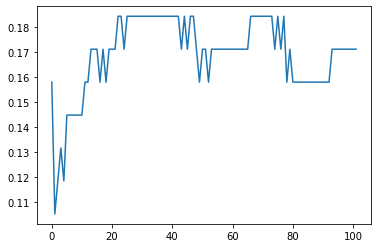

In [78]:
# Plotting the errors
# ------------------
errors = xgb_clf.evals_result_.get('validation_0').get('error')
plt.plot(errors)
plt.show()

In [49]:
# print the best iteration
xgb_clf.best_iteration

1

In [50]:
# the best ntree_limit
xgb_clf.best_ntree_limit

2

In [51]:
# the best score
xgb_clf.best_score

0.105263

## References:

- XGBoost API [here](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.training)

- SKlearn API for XGBoost [here](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)

- XGBoost github [here](https://github.com/dmlc/xgboost/blob/master/demo/README.md)